In [4]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.utils.validation import column_or_1d
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('spam.csv', encoding ='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.v1.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [9]:
source=data.v2
source[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [11]:
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [12]:
target=data.v1
target=target.replace('ham',0)
target = target.replace('spam',1)
target[:5]

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [13]:
text_data=np.array(source)
text_data

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [15]:
count=CountVectorizer()
count=count.fit(text_data)
bag_words=count.transform(text_data)
bag_words

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [16]:
X=bag_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X.shape

(5572, 8672)

In [19]:
y=np.array(target)
y.shape

(5572,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf=MultinomialNB()
model = clf.fit(X_train, y_train)

In [21]:
print('Training data/score: ',model.score(X_train, y_train))
print('Test data/score: ',model.score(X_test, y_test))

Training data/score:  0.9939421135292797
Test data/score:  0.979372197309417


In [23]:
y_pred=model.predict(X_test)

In [24]:
print('Prediction accuracy: ', accuracy_score(y_test,y_pred)*100,'%')

Prediction accuracy:  97.9372197309417 %


In [25]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[967,  14],
       [  9, 125]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       981
           1       0.90      0.93      0.92       134

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [29]:
y_prob=model.predict_proba(X_test)
y_prob

array([[1.00000000e+00, 3.31568279e-15],
       [9.92675273e-01, 7.32472682e-03],
       [9.99999937e-01, 6.33097658e-08],
       ...,
       [5.01838684e-04, 9.99498161e-01],
       [9.99810608e-01, 1.89392243e-04],
       [9.99998103e-01, 1.89702267e-06]])

In [30]:
roc_auc_score(y_test, y_prob[:,1])

0.9860711731860574

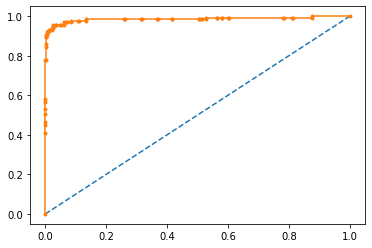

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

In [32]:
# Save to file in the current working directory
pkl_filename = 'spam_ham_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [33]:
# Read model
with open(pkl_filename, 'rb') as file:
    spam_ham_model = pickle.load(file)

In [34]:
X1=np.array(['Dear Ms. Phuong, I will come on time.',
             'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%'])
X1=count.transform(X1)

In [37]:
X1[:5]

<2x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [35]:
y_pred1=spam_ham_model.predict(X1)
y_pred1

array([0, 1], dtype=int64)